## imports and files

In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random

In [2]:
config_key_mapper = "key_config_mapper.csv"
results_addr = "."

## config map reader

In [3]:
def config_reader(csv_addr):
    key_config_df = pd.read_csv(csv_addr)
    return key_config_df
    

In [15]:
def get_experiment_detail(experiment_id):
    df = config_reader(config_key_mapper)
    return df[df["experiment_id"]==experiment_id]

In [4]:
key_config_df = config_reader(config_key_mapper)
key_config_df

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,replicas
0,0,paper-audio-qa,audio,facebook/s2t-small-librispeech-asr,4,4Gi,5,1,1,10,1
1,2,paper-audio-qa,audio,facebook/s2t-small-librispeech-asr,4,4Gi,5,1,1,10,1
2,3,paper-audio-qa,audio,facebook/s2t-small-librispeech-asr,4,4Gi,5,1,1,10,1


In [16]:
get_experiment_detail(3)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,replicas
2,3,paper-audio-qa,audio,facebook/s2t-small-librispeech-asr,4,4Gi,5,1,1,10,1


In [5]:
def get_result_file_names(results_addr):
    files = []
    key_config = config_reader(config_key_mapper)
    experiments_keys = list(key_config["experiment_id"])
    for path in os.listdir(results_addr):
        if os.path.isfile(os.path.join(results_addr, path)):
            file_name = path.split(".")[0]
            try:
                if int(file_name) in experiments_keys:
                    files.append(path)
            except:
                pass
    return files

In [6]:
get_result_file_names(results_addr=results_addr)

['3.json']

## Read resutls

In [7]:
def read_results(results_addr, return_type = "all", specific_file = None ):
    files = get_result_file_names(results_addr=results_addr)
    
    if return_type == "all":
        return_results = {}
        for f in files:
            name = f.split(".")[0].split("/")[-1]
            json_file = open(f)
            return_results[name] = json.load(json_file)
        return return_results

            
read_results(results_addr=results_addr)            
        

{'3': {'cpu_usage': [6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.600069775,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.731229521,
   6813.73122

In [8]:
def latency_calculator(results):
    latencies = []
    for result in results:
        data = result['outputs'][0]['data']
        model_name = result['model_name']
        arrival_key = "arrival_" + model_name
        serve_key   = "serving_" + model_name
        data = json.loads(data[0])
        time = data["time"]
        latency = time[serve_key] - time[arrival_key]
        latencies.append(latency)
    return sum(latencies) / len(latencies)
        

In [49]:
def result_processing(kind_processing = "all", metrics = ["all"], functions = [], specific_experiments = []):
    results = read_results(results_addr=results_addr)            
    final_dataframe = []
    if kind_processing == "all":   
        if metrics[0] == "all":
            for key in results.keys():
                current_result_key = [random.randint(0, 100)]
                data = results[key]
                if len(functions) == 0:
                    for data_key in data.keys():
                        metric_result = data[data_key]
                        print(data_key)
                        if "time" in data_key:
                            current_result_key.append(metric_result[0])
                        elif data_key == "responses":
                            current_result_key.append(latency_calculator(metric_result))
                        else:
                            try:
                                current_result_key.append(max(metric_result))
                            except:
                                current_result_key.append(0)
                current_result_key[0] = random.randint(0, 100)

                final_dataframe.append(current_result_key)
                new_data = deepcopy(current_result_key)
                new_data[0] = random.randint(0, 100)
                final_dataframe.append(new_data)
                                new_data = deepcopy(current_result_key)
                new_data[0] = random.randint(0, 100)
                final_dataframe.append(new_data)
                new_data = deepcopy(current_result_key)
                new_data[0] = random.randint(0, 100)
                final_dataframe.append(new_data)
                new_data = deepcopy(current_result_key)
                new_data[0] = random.randint(0, 100)
                final_dataframe.append(new_data)
                
            
            return final_dataframe
        
        
        
        
        

In [50]:
results = result_processing()

cpu_usage
time_cpu
memory_usage
time_memory
responses
latency
throughput


In [51]:
headers = ["experiment_id", "cpu_usage", "time_cpu", "memory_usage", "time_memory", "latency_responses", "latency_from_seldon", "throughput"]

In [58]:

df = pd.DataFrame(results, columns=headers)


In [59]:
df

,experiment_id,cpu_usage,time_cpu,memory_usage,time_memory,latency_responses,latency_from_seldon,throughput
0,83,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0
1,83,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0
2,83,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0
3,83,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0


In [32]:
def get_final_df_results():
    results = result_processing()
    headers = ["experiment_id", "cpu_usage", "time_cpu", "memory_usage", "time_memory", "latency_responses", "latency_from_seldon", "throughput"]
    df = pd.DataFrame(results, columns=headers)
    return df

In [33]:
get_final_df_results()

cpu_usage
time_cpu
memory_usage
time_memory
responses
latency
throughput


,experiment_id,cpu_usage,time_cpu,memory_usage,time_memory,latency_responses,latency_from_seldon,throughput
0,3,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0
1,3,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0
2,3,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0
3,3,6945.566498,1.666053e+09,1.035059e+09,1.666053e+09,5.438508,0,0


In [34]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Life expectancy plot with a selectable hover mode'),
    html.P("Select hovermode:"),
    dcc.RadioItems(
        id='hovermode',
        inline=True,
        options=['x', 'x unified', 'closest'],
        value='closest'
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("hovermode", "value"))
def update_hovermode(mode):
    df = px.data.gapminder().query("continent=='Oceania'") # replace with your own data source
    fig = px.line(
        df, x="year", y="lifeExp", color="country", 
        title="Hover over points to see the change")
    fig.update_traces(
        mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode=mode)
    return fig


app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 98] Address already in use

cpu_usage
time_cpu
memory_usage
time_memory
responses
latency
throughput
  experiment_id    cpu_usage      time_cpu  memory_usage   time_memory  \
0             3  6945.566498  1.666053e+09  1.035059e+09  1.666053e+09   
1             3  6945.566498  1.666053e+09  1.035059e+09  1.666053e+09   
2             3  6945.566498  1.666053e+09  1.035059e+09  1.666053e+09   
3             3  6945.566498  1.666053e+09  1.035059e+09  1.666053e+09   

   latency_responses  latency_from_seldon  throughput  
0           5.438508                    0           0  
1           5.438508                    0           0  
2           5.438508                    0           0  
3           5.438508                    0           0  


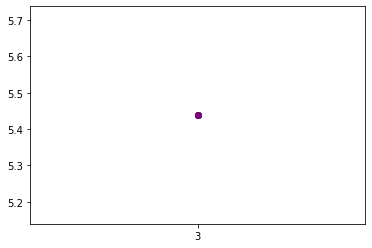

In [42]:
colors = ["red", "blue", "green", "purple"]
def plotter(df, metric):
    print(df)
    for index, row in df.iterrows():
        plt.scatter(row['experiment_id'], row[metric], color=colors[index], label=row['experiment_id'])  

    plt.show()
plotter(get_final_df_results(), "latency_responses")